---
title: 'Лабораторна робота 4. OpenCV. Просторові методи обробки зображень. Робота з околом. Просторова фільтрація зображення (short version)'
description:
   Документ зроблено за допомогою [Quarto](https://quarto.org/)
author: "&copy; [<span style='color: blue;'>Tereshchenko Daniil </span>](https://github.com/whytereshchenko/Tereshchenko_OpenCV), 2023"
date: "12.14.2023"
lang: ukr
format:
  html:
    code-fold: true
    toc: true # меню
    toc_float: # спливаюче меню  
      collapsed: true # авто
      number_sections: true
jupyter: python3
---

__Мета:__ _знайомство з просторовими методами фільтрації зображень засобами OpenCV у середовищі Anaconda із застосуванням Jupyter Notebook засобами мови програмування Python._

#### Що ви будете вміти?
* Реалізувати методи просторової лінійної фільтрації
* Виконувати побудову наступних згладжуючих фільтрів:
  * низькочастотний фільтр лінійний фільтр на основі простого середнього ковзного (Normalized Box Filter)
  * низькочастотний фільтр з ядром Гауса (Gaussian Filter)
  * медіанний фільтр
  * двосторонній фільтр (Bilateral Filter)

## Короткі теоретичні відомості

### Концепція просторової фільтрації

__Просторовий лінійний фільтр__ задається лінійної згорткою

$$
g(i, j) = \sum_{k, l} f(i + k, j + l) h(k, l),
$$

де $f(i, j)$ -- вхідне зображення; $g(i, j)$ -- вихідне зображення; $h(k, l)$ -- матриця коуфіцієнтів фільтра, яка називається _ядром_.  

Фільтр повністю задається своїми кофіцієнтами. 


Наведемо деякі приклади.

In [1]:
# Імпортуємо пакети
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
import sys

# print(f'version cv2: {cv.__version__}')
print('version cv2: %s' % cv.__version__)

version cv2: 4.6.0


In [ ]:
# імпортуємо RGB-зображення
image = cv.imread('image/me.png')
print(f'image shape/dimentions: {image.shape}')
print(f'image number of pixel: {image.size}')

# розділяємо зображення на канали
red, green, blue = cv.split(image)
# формуємо напівтонове зображення
image_gray = cv.imread('image/me.png', 0)

print(f'grey image shape/scale: {image_gray.shape}')
print(f'grey image number of pixel: {image_gray.size}')

# візуалізуємо зображення
cv.imshow('color image', image)
cv.waitKey(0)
cv.destroyAllWindows()

### [Просте середє ковзне (Normalized Box Filter)](https://docs.opencv.org/4.x/dc/dd3/tutorial_gausian_median_blur_bilateral_filter.html)



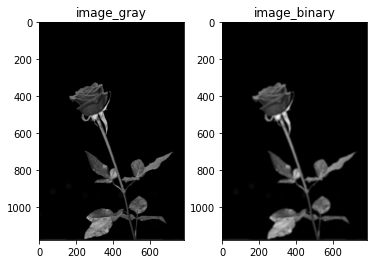

In [18]:
# Візуалізація за допомогою matplotlib
# plt.imread('rose.png')
plt.gray()
# plt.subplot(111)
# plt.imshow(image_gray)
# plt.title('Gray Image')
# plt.show()
# plt.savefig('Gray_image.png')


# Реалізація низькочастотно фільтра на основі простого середнього ковзного з параметрами вікна 10 х 10 
dst = cv.blur(image_gray, (10, 10))




# Побудова і вивід зображення у файл
plt.subplot(121)
plt.imshow(image_gray)
plt.title('image_gray')
plt.subplot(122)
plt.imshow(dst)
plt.title('image_binary')
# plt.savefig('image_binary.png')
plt.show()

__Завдання для самостійної роботи__.
  * Реалізувати фільтр на основі ядра Гауса
  * Написати процедуру, яка б зашумлювала нормальним шумом з параметрами $(n, \mu, \sigma)$ зображення
  * Взявши за основу власний портрет, зашумити його нормальним шумом
  * Реалізувати медіанний фільтр і продемонструвати послідовно роботу медіанного і гаусового фільтру, оптимально підібравши і обґрунтувавши значення параметрів
  * Реалізувати двосторонній фільтр
  * Написати процедуру, до складу якої б входили всі низькочастотні фільтри, які досліджуються в цій лабораторній роботі, а вибір потрібного задавався відповідним вхідним параметром.
  

### 1. [Фільтр з ядром Гауса](https://docs.opencv.org/4.x/dc/dd3/tutorial_gausian_median_blur_bilateral_filter.html)

$K(x, y) = \frac{1}{2\pi\sigma^2} \cdot e^{-\frac{x^2 + y^2}{2\sigma^2}}$

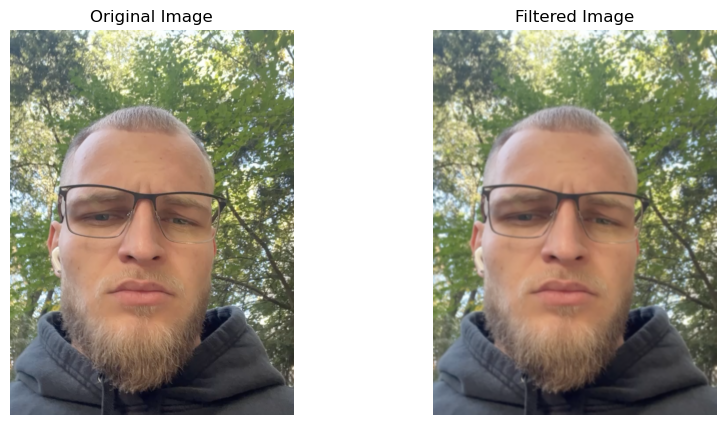

In [2]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

def load_image(path):
    return cv2.imread(path)

def display_images(original, modified, titles=('Original Image', 'Filtered Image'), figsize=(10, 5)):
    plt.figure(figsize=figsize)
    plt.subplot(1, 2, 1)
    plt.imshow(cv2.cvtColor(original, cv2.COLOR_BGR2RGB))
    plt.title(titles[0])
    plt.axis('off')

    plt.subplot(1, 2, 2)
    plt.imshow(cv2.cvtColor(modified, cv2.COLOR_BGR2RGB))
    plt.title(titles[1])
    plt.axis('off')

    plt.show()

def gaussian_filter(image, sigma=1):
    kernel_size = int(6 * sigma + 1)
    kernel_size += 1 if kernel_size % 2 == 0 else 0
    kernel = np.fromfunction(
        lambda x, y: (1/(2*np.pi*sigma**2)) * 
                     np.exp(-((x-(kernel_size-1)/2)**2 + (y-(kernel_size-1)/2)**2) / (2*sigma**2)),
        (kernel_size, kernel_size)
    )
    kernel /= np.sum(kernel)
    return cv2.filter2D(image, -1, kernel)

image_path = 'image/me.png'
image = load_image(image_path)

filtered_image = gaussian_filter(image, sigma=2)

display_images(image, filtered_image)


### 2. [Двосторонній фільтр](https://docs.opencv.org/4.x/dc/dd3/tutorial_gausian_median_blur_bilateral_filter.html) 


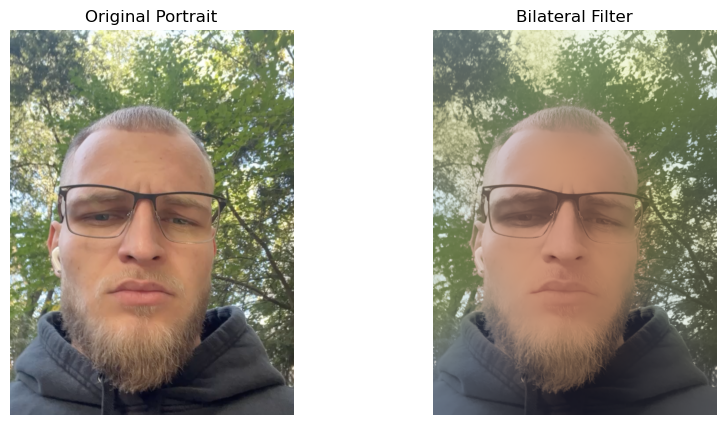

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def load_image(path):
    return cv2.imread(path)

def apply_bilateral_filter(image, spatial_sigma=75, intensity_sigma=75):
    return cv2.bilateralFilter(image, d=0, sigmaColor=intensity_sigma, sigmaSpace=spatial_sigma)

def display_images(original, modified, titles=('Original', 'Modified'), figsize=(10, 5)):
    plt.figure(figsize=figsize)
    plt.subplot(1, 2, 1)
    plt.imshow(cv2.cvtColor(original, cv2.COLOR_BGR2RGB))
    plt.title(titles[0])
    plt.axis('off')

    plt.subplot(1, 2, 2)
    plt.imshow(cv2.cvtColor(modified, cv2.COLOR_BGR2RGB))
    plt.title(titles[1])
    plt.axis('off')

    plt.show()

image_path = 'image/me.png'
portrait_image = load_image(image_path)

bilateral_filtered_portrait = apply_bilateral_filter(portrait_image)

display_images(portrait_image, bilateral_filtered_portrait, ('Original Portrait', 'Bilateral Filter'))


### 3. [Написати процедуру, яка б зашумлювала нормальним шумом ]() 

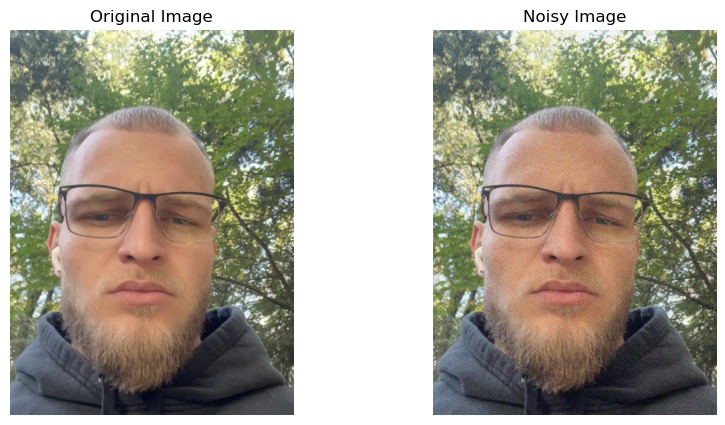

In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

def add_gaussian_noise(image, mean=0, sigma=25):
    gauss = np.random.normal(mean, sigma, image.shape)
    return np.clip(image + gauss, 0, 255).astype(np.uint8)

def display_images(original, modified, figsize=(10, 5)):
    plt.figure(figsize=figsize)
    plt.subplot(1, 2, 1)
    plt.imshow(cv2.cvtColor(original, cv2.COLOR_BGR2RGB))
    plt.title('Original Image')
    plt.axis('off')

    plt.subplot(1, 2, 2)
    plt.imshow(cv2.cvtColor(modified, cv2.COLOR_BGR2RGB))
    plt.title('Noisy Image')
    plt.axis('off')
    plt.show()

image_path = 'image/me.png'
image = cv2.imread(image_path)
noisy_image = add_gaussian_noise(image)

display_images(image, noisy_image)


### 4. [медіанний фільтр]() 

$I_{\text{вихід}}(x, y) = a \cdot I_{\text{вхід}}(x, y) + b$

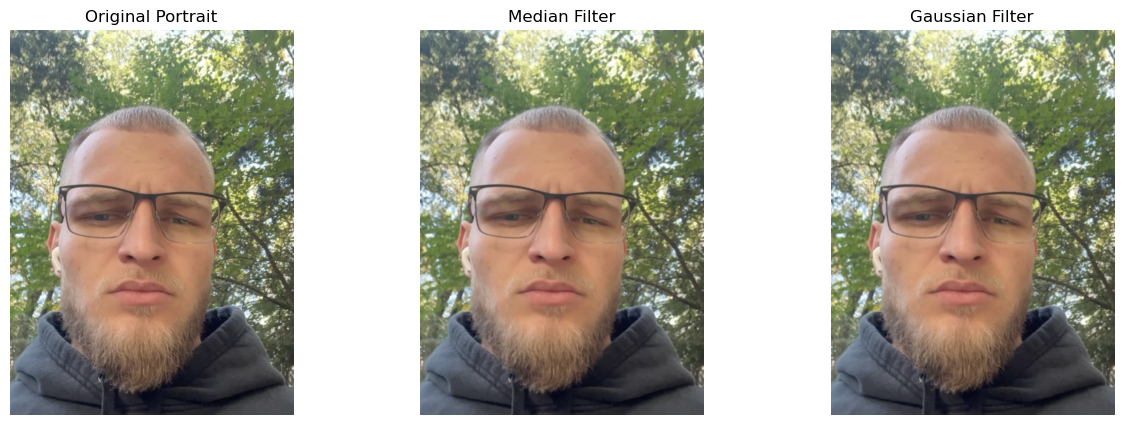

In [5]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

def apply_filters(image, filters):
    results = [func(image, **params) for func, params in filters]
    return [image] + results

def gaussian_filter(image, sigma=1):
    kernel_size = int(6 * sigma + 1)
    kernel_size += 1 if kernel_size % 2 == 0 else 0
    kernel = np.fromfunction(
        lambda x, y: (1/(2*np.pi*sigma**2)) * 
                     np.exp(-((x-(kernel_size-1)/2)**2 + (y-(kernel_size-1)/2)**2) / (2*sigma**2)),
        (kernel_size, kernel_size)
    )
    kernel /= np.sum(kernel)
    return cv2.filter2D(image, -1, kernel)

def median_filter(image, kernel_size=5):
    return cv2.medianBlur(image, kernel_size)

def display_images(images, titles, figsize=(15, 5)):
    plt.figure(figsize=figsize)
    for i, (img, title) in enumerate(zip(images, titles)):
        plt.subplot(1, len(images), i + 1)
        plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
        plt.title(title)
        plt.axis('off')
    plt.show()

image_path = 'image/me.png'
portrait_image = cv2.imread(image_path)

filters = [
    (median_filter, {'kernel_size': 5}),
    (gaussian_filter, {'sigma': 1})
]

filtered_images = apply_filters(portrait_image, filters)
titles = ['Original Portrait', 'Median Filter', 'Gaussian Filter']

display_images(filtered_images, titles)


### 5. [Написати процедуру, до складу якої б входили всі низькочастотні фільтри]() 

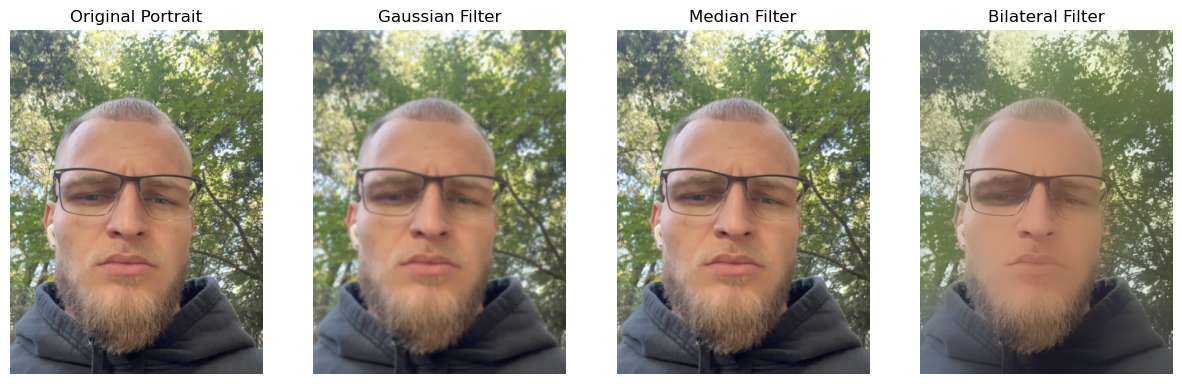

In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

def gaussian_filter(image, sigma=1):
    kernel_size = int(6 * sigma + 1)
    kernel_size += 1 if kernel_size % 2 == 0 else 0
    kernel = np.fromfunction(
        lambda x, y: (1/(2*np.pi*sigma**2)) * 
                     np.exp(-((x-(kernel_size-1)/2)**2 + (y-(kernel_size-1)/2)**2) / (2*sigma**2)),
        (kernel_size, kernel_size)
    )
    kernel /= np.sum(kernel)
    return cv2.filter2D(image, -1, kernel)

def median_filter(image, kernel_size=5):
    return cv2.medianBlur(image, kernel_size)

def bilateral_filter(image):
    return cv2.bilateralFilter(image, d=0, sigmaColor=75, sigmaSpace=75)

def apply_low_pass_filters(image):
    gaussian_filtered = gaussian_filter(image, sigma=3)
    median_filtered = median_filter(image, kernel_size=5)
    bilateral_filtered = bilateral_filter(image)
    return gaussian_filtered, median_filtered, bilateral_filtered

image_path = 'image/me.png'
portrait = cv2.imread(image_path)
gaussian_filtered, median_filtered, bilateral_filtered = apply_low_pass_filters(portrait)

plt.figure(figsize=(15, 5))

plt.subplot(1, 4, 1)
plt.imshow(cv2.cvtColor(portrait, cv2.COLOR_BGR2RGB))
plt.title('Original Portrait')
plt.axis('off')

plt.subplot(1, 4, 2)
plt.imshow(cv2.cvtColor(gaussian_filtered, cv2.COLOR_BGR2RGB))
plt.title('Gaussian Filter')
plt.axis('off')

plt.subplot(1, 4, 3)
plt.imshow(cv2.cvtColor(median_filtered, cv2.COLOR_BGR2RGB))
plt.title('Median Filter')
plt.axis('off')

plt.subplot(1, 4, 4)
plt.imshow(cv2.cvtColor(bilateral_filtered, cv2.COLOR_BGR2RGB))
plt.title('Bilateral Filter')
plt.axis('off')

plt.show()


### Завдання на лабораторну роботу

1. Створити Notebook-документ `<lab_1_StudentLastName>` за допомогою Jupyter Notebook. (Див. [тут](https://devpractice.ru/python-lesson-1-install/), [тут](https://devpractice.ru/python-lesson-6-work-in-jupyter-notebook/) і [тут](https://jupyter-notebook.readthedocs.io/en/stable/notebook.html)).

1. Відобразити в робочому документі ("зошиті" ipython) виконання пунктів 1-2 наведених вище, скориставшись інтерактивними посиланнями на відповідну документацію. Та виконати __Завдання для самостійної роботи__ __В якості зображення використати власний портрет, отриманий за допомогою цифрової камери__

1. Робочий документ оформити у вигляді Notebook-документу (файл __.ipynb__).

1. Дати відповіді на контрольні запитання.

1. Скомпілювати звіт у форматі __.html__. Для цього необхідно завантажити термінал і у командному рядку запустити наступну команду:

`jupyter nbconvert lab_1_StudentLastName.ipynb --to html`

10. Представити звіт у вигляді архіву. Проект має складатися мінімум з двох файлів: `lab_1_StudentLastName.ipynb` та `lab_1_StudentLastName.html`

### Контрольні запитання

1. У чому полягає сенс градаційних перетворень? - Застосування градаційних трансформацій у редагуванні зображень допомагає в налаштуванні яскравості та контрасту, що сприяє покращенню візуальної якості. Коригування параметрів, таких як коефіцієнти a та b у цих трансформаціях, дозволяє пристосувати зображення до різноманітних рівнів освітлення. Підсилення контрасту виразно розділяє темніші та світліші ділянки, підвищуючи розрізнення деталей. Регулювання яскравості через градаційні трансформації може ефективно виправити експозицію та створити різні атмосфери у фотографіях. Цей метод також може бути застосований для зниження рівня шуму та підкреслення ключових елементів, роблячи зображення більш привабливим та змістовним. У галузях, як-от графічний дизайн, фотографія та редагування зображень, градаційні перетворення широко використовуються для досягнення кращої якості та візуального ефекту.

1. На чому ґрунтуються гістограмні методи? - Методи обробки зображень, що базуються на аналізі гістограми, фокусуються на вивченні розподілу яскравості пікселів. Вони включають автоматичне коригування контрасту шляхом розтягування або стиснення гістограми для поліпшення візуального сприйняття. Еквалізація гістограми рівномірно розподіляє рівні яскравості, підсилюючи загальний контраст зображення. Гістограмні методи також застосовуються для адаптивного виправлення контрасту в окремих частинах зображення, ураховуючи їх локальні особливості. Додатково, вони використовуються для бінаризації, встановлення порогових значень і аналізу піків і впадин у гістограмі, що є ключовим для сегментації та розпізнавання об'єктів. Ці методи відіграють значну роль у сфері обробки зображень та їх аналізу.

### References

1. Anaconda (Python distribution). https://uk.wikipedia.org/wiki/Anaconda_(Python_distribution)
2. Conda. https://conda.io/en/latest/
3. Histograms. https://docs.opencv.org/master/d6/dc7/group__imgproc__hist.html#ga6ca1876785483836f72a77ced8ea759a
4. Smoothing Images. https://docs.opencv.org/4.x/dc/dd3/tutorial_gausian_median_blur_bilateral_filter.html
5. Image Processing (imgproc module). https://docs.opencv.org/master/d7/da8/tutorial_table_of_content_imgproc.html
6. Computer Vision: Algorithms and Applications, 2nd ed. http://szeliski.org/Book/